# we will be exploring a loan approval dataset

In [179]:
import pandas as pd
train=pd.read_csv('C:\\Users\\Maram\\Desktop\\GoMyCode\\Train_loan_Home.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [180]:
train.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [181]:
### dataset has 13 columns and 614 rows.
### Columns and what they are for:
###Loan_ID:Unique Loan ID
###Gender:Male/ Female
###Married:Applicant married (Y/N)
###Dependents:Number of dependents
###Education:Applicant Education (Graduate/ Under Graduate)
###Self_Employed:Self employed (Y/N)
###ApplicantIncome:Applicant income
###CoapplicantIncome:Coapplicant income
###LoanAmount:Loan amount in thousands
###Loan_Amount_Term:Term of loan in months
###Credit_History:credit history meets guidelines
###Property_Area:Urban/ Semi Urban/ Rural
###Loan_Status:Loan approved (Y/N)

In [182]:
### we can see that our dataset contains some missing information in different columns

In [183]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [184]:
train = train.reset_index()

In [185]:
num_col= ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Credit_History','Loan_Amount_Term']
print(num_col)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History', 'Loan_Amount_Term']


### 'Credit_History','Loan_Amount_Term' even if they are categorical data we will for now treat them as numerical to deal with the missing values and later on we will continue our work with it being dealt as categorical data 

In [186]:
train= train.drop(columns=['Loan_ID'])

### we dropped the ID column because it doesn't serve us at this stage and doesn't influence our  prediction so it would be easier to deal with the dataset without it as its information is unique and only serves to identifie each applicant
### we split the other columns into categorical and numerical colums to make our work with them much easier

In [187]:
train.isnull().sum()

index                 0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [283]:
train_encoded = pd.get_dummies(train,drop_first=True)
train_encoded.head()

,index,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Dependents_1,Dependents_2,Dependents_3+,Loan_Status_Y
0,0,1,0,0,0,5849,0.0,146.412162,360.0,1.0,2,0,0,0,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,1,0,0,0
2,2,1,1,0,1,3000,0.0,66.000000,360.0,1.0,2,0,0,0,1
3,3,1,1,1,0,2583,2358.0,120.000000,360.0,1.0,2,0,0,0,1
4,4,1,0,0,0,6000,0.0,141.000000,360.0,1.0,2,0,0,0,1


### we will be working on preprocessing the data and dealing with the missing data

In [189]:
train.dropna(axis=1,how='all')

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [190]:
### our first step in dealing with the missing data is to drop any line that is in its entirety filled with missing data since 
##we have no reason to keep it

In [191]:
train[num_col] = train[num_col].fillna(train.mean())

In [192]:
### we replaced the missing data in the 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Credit_History','Loan_Amount_Term'
## columns with its mean

In [193]:
train.isnull().sum()

index                 0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [194]:
most_occuring_gender=len(train['Gender'])
print("Most occuring gender : ", most_occuring_gender)
print(train['Gender'].value_counts())

Most occuring gender :  614
Male      489
Female    112
Name: Gender, dtype: int64


In [195]:
train['Gender'].fillna('Male', inplace=True)

In [196]:
status=len(train['Married'])
print("Marital status : ", status)
print(train['Married'].value_counts())

Marital status :  614
Yes    398
No     213
Name: Married, dtype: int64


In [197]:
train['Married'].fillna('Yes', inplace=True)

In [198]:
number_of_dependents=len(train['Dependents'])
print("Number of dependents : ", number_of_dependents)
print(train['Dependents'].value_counts())

Number of dependents :  614
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


In [199]:
train['Dependents'].fillna('0', inplace=True)

In [200]:
job_status=len(train['Self_Employed'])
print("Are you self employer : ", job_status)
print(train['Self_Employed'].value_counts())

Are you self employer :  614
No     500
Yes     82
Name: Self_Employed, dtype: int64


In [201]:
train['Self_Employed'].fillna('No', inplace=True)

In [202]:
### we replaced the missing data in Self_Employed,Dependents,Married,Gender with the most occuring data

In [203]:
train.isnull().sum().sum()

0

In [204]:
### we checked that there were no more missing data

In [284]:
X = train_encoded.drop(columns='Loan_Status_Y')
y = train_encoded['Loan_Status_Y']

In [206]:
### we split our data to having the 'Loan_Status_Y' as our target and the rest of the columns as our features

In [207]:
train_encoded.head()

,index,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [208]:
train.head()

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [209]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

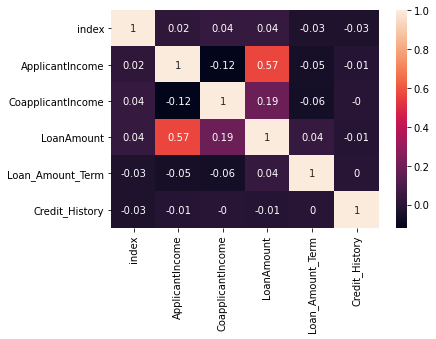

In [210]:
correlation_matrix = train.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [211]:
### we used the correlation tree to understand more the relationships the columns have with each other and how strong they are.
## we can observe that the ApplicantIncome has the strongest influence on the LoanAmount
## while the CoapplicantIncome doesn't have as much of an importance
## the other columns such as Credit History and Loan Amount Term don't show any significant influence

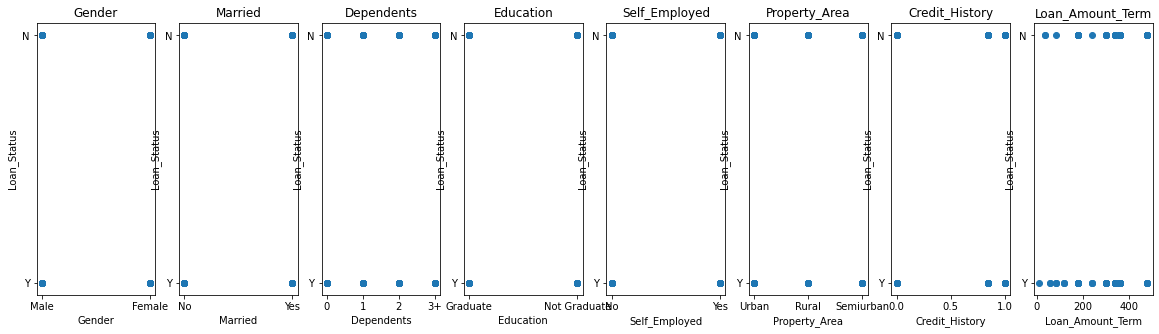

In [212]:
plt.figure(figsize=(20, 5))

features =['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
target = train['Loan_Status']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = train[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Loan_Status')

In [213]:
### we are trying to further understand the relationship of the columns with the target column which is Loan_Status
### the subplots in our case don't clarify this relationship

<AxesSubplot:title={'center':'Histogram of the different Applicant"s income'}, xlabel='ApplicantIncome', ylabel='Frequency'>

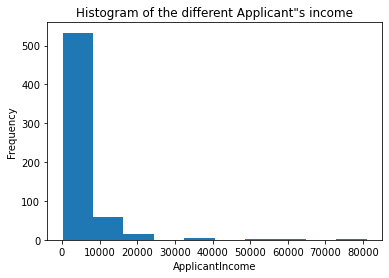

In [214]:
import matplotlib.pyplot as plt
plt.title('Histogram of the different Applicant"s income')
plt.xlabel('ApplicantIncome')
train['ApplicantIncome'].plot.hist()

In [215]:
### we can see that most applicants have an income around 10.000 

<AxesSubplot:xlabel='Loan_Status', ylabel='Credit_History'>

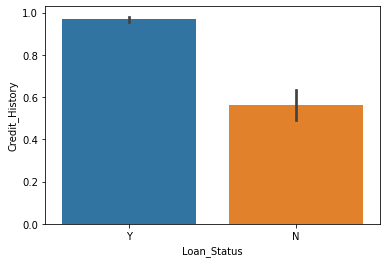

In [216]:
sns.barplot(x='Loan_Status', y='Credit_History', data=train)

In [217]:
### those who have a stronger credit history have a better  chance at getting an approval

Loan_Status    N    Y
Gender               
Female        37   75
Male         155  347


Text(0, 0.5, 'Percentage')

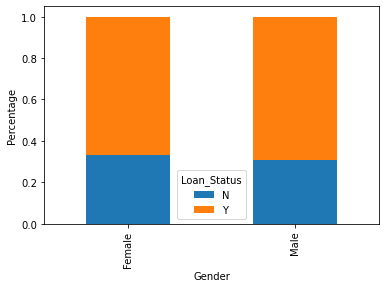

In [218]:
tab = pd.crosstab(train['Gender'], train['Loan_Status'])
print (tab)
tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Gender')
plt.ylabel('Percentage')

In [219]:
### the gender of the applicant doesn't have an influence on the approval rate

Loan_Status      N    Y
Self_Employed          
No             166  366
Yes             26   56


Text(0, 0.5, 'Percentage')

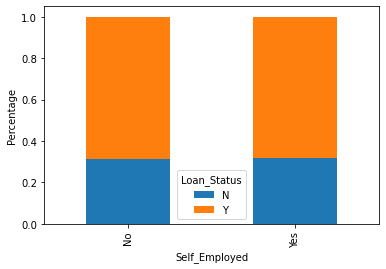

In [220]:
tab = pd.crosstab(train['Self_Employed'], train['Loan_Status'])
print (tab)
tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Self_Employed')
plt.ylabel('Percentage')

In [221]:
### whether the applicant is self-employed or not it has no direct influence on the approval of the loan

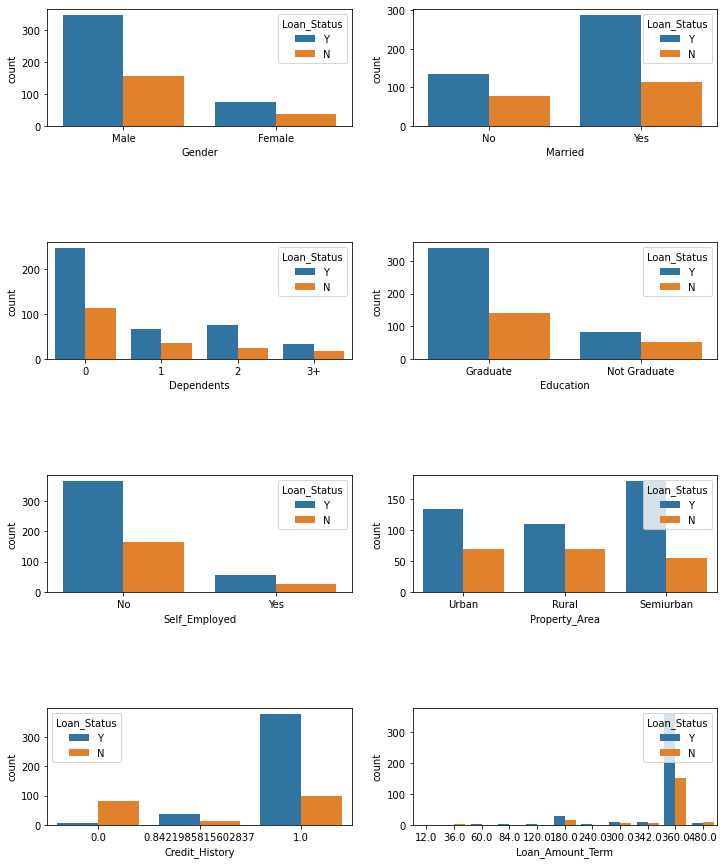

In [222]:
categorical = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat in enumerate(categorical):
    row,col = idx//2,idx%2
    sns.countplot(x=cat,data=train,hue='Loan_Status',ax=axes[row,col])

plt.subplots_adjust(hspace=1)

### we can see that about of 2/3 of applicants were granted loans
### we have 3 times the number of men compared to women
### we have more married applicants than not married and they are more likely to get loans
### the majority have no dependents and also they are more likely to get loans
### graduates are more likely to get loans
### applicants from smiurban areas are more likely to get loans
### applicants with credit history are far more likely to be accepted
### majority of the loans taken are for 360 Months


       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  614.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   84.037468
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.250000
50%        3812.500000        1188.500000  129.000000
75%        5795.000000        2297.250000  164.750000
max       81000.000000       41667.000000  700.000000


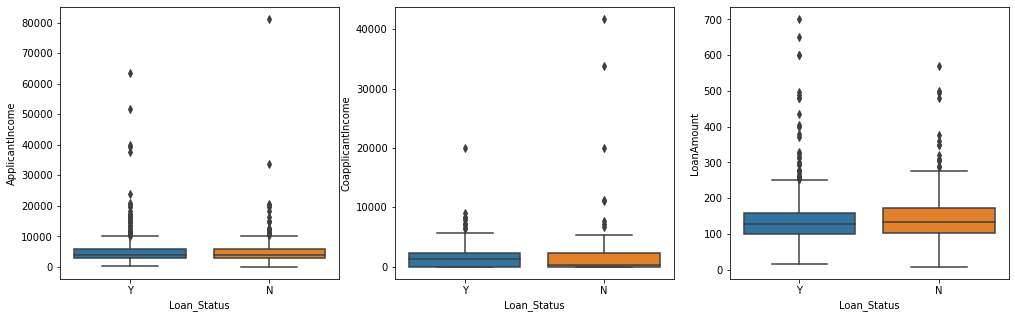

In [223]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=train,x='Loan_Status',ax=axes[idx])

print(train[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

In [224]:
### numerical data chosen for this dataset: ApplicantIncome, CoapplicantIncome annd LoanAmount don't have as  significant 
#of an influence on whether you are more likely to get accepted or not. So in this case we can chose to not focus on them 
#but on the categorical data instead

# we will be spliting the data into training and testing data

In [285]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)

In [286]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(X_train)
X_train = imp_train.transform(X_train)
X_test_imp = imp_train.transform(X_test)

In [227]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [228]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_train)

In [229]:
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Training Data Set Accuracy:  1.0
Validation Mean Accuracy:  0.7025974025974027


In [230]:
### we tested both our training data accuracy and the validation mean accuracy
##Validation Mean Accuracy:the accuracy you calculate on the data set you do not use for training
## We can see that Training Accuracy > Test Accuracy with default settings of Decision Tree classifier. model is overfit

In [287]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [288]:
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 0.39217149871601853
R2 score is 0.28556221012597127


In [289]:
y_test_predict = lin_model.predict(X_test_imp)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 0.35223807246322025
R2 score is 0.4188606379289729


<AxesSubplot:xlabel='Max_Depth', ylabel='Values'>

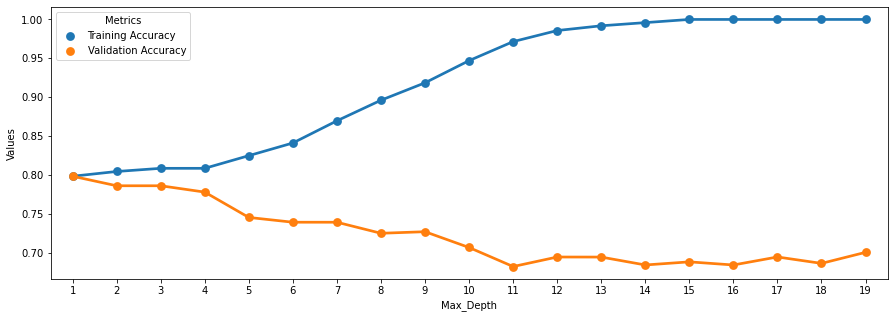

In [234]:
training_accuracy = []
val_accuracy = []
tree_depths = []

for depth in range(1,20):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    val_mean_accuracy = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    tree_depths.append(depth)
    
Tuning_Max_depth = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Max_Depth": tree_depths }
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

plot_df = Tuning_Max_depth_df.melt('Max_Depth',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Max_Depth", y="Values",hue="Metrics", data=plot_df,ax=ax)

In [242]:
### we can chose max depth 3=  since the accuracy is 1.00

### Visulazing Decision Tree

In [243]:
import graphviz 
from sklearn import tree

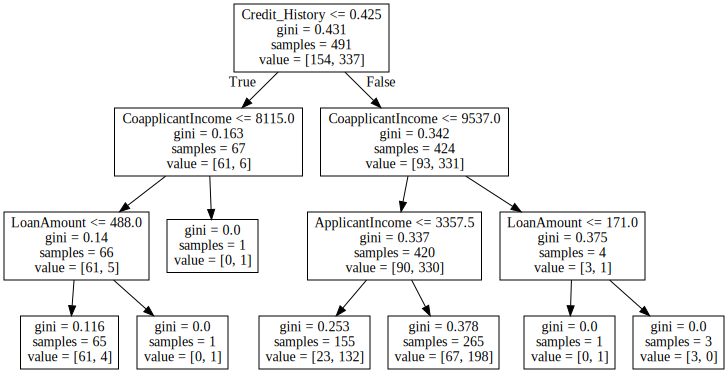

In [244]:
tree_clf = tree.DecisionTreeClassifier(max_depth = 3)
tree_clf.fit(X_train,y_train)
dot_data = tree.export_graphviz(tree_clf,feature_names = X.columns.tolist())
graph = graphviz.Source(dot_data)
graph

In [245]:
 ### our classifier might be overfited since some leafs have less than 5 samples

### we will be working on improving our test accuracy

<AxesSubplot:xlabel='Min_Samples_leaf', ylabel='Values'>

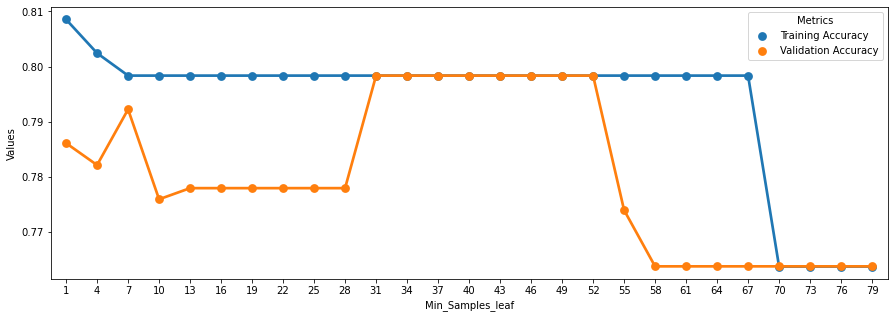

In [247]:
training_accuracy = []
val_accuracy = []
min_samples_leaf = []
import numpy as np
for samples_leaf in range(1,80,3): 
    tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = samples_leaf)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    val_mean_accuracy = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    min_samples_leaf.append(samples_leaf)
    

Tuning_min_samples_leaf = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Min_Samples_leaf": min_samples_leaf }
Tuning_min_samples_leaf_df = pd.DataFrame.from_dict(Tuning_min_samples_leaf)

plot_df = Tuning_min_samples_leaf_df.melt('Min_Samples_leaf',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Min_Samples_leaf", y="Values",hue="Metrics", data=plot_df,ax=ax)

In [248]:
### we will choose Min_Samples_leaf=35 to improve test accuracy

In [249]:
from sklearn.metrics import confusion_matrix
tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 35)
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_test_imp)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8536585365853658
Confusion Matrix on Test Data


Predicted,N,Y,All
True,,,
N,21,17,38
Y,1,84,85
All,22,101,123


In [290]:
from sklearn.tree import DecisionTreeRegressor
DT_model = DecisionTreeRegressor(max_depth=5).fit(X_train,y_train)
DT_predict = DT_model.predict(X_test_imp) 
print(DT_predict)

[0.         0.81884058 0.81884058 0.70588235 0.92592593 0.70588235
 0.81884058 0.81884058 0.70588235 0.92592593 0.92592593 0.81884058
 0.81884058 0.92592593 0.         0.         0.92592593 0.
 0.         0.66666667 0.         0.70588235 1.         0.92592593
 0.92592593 0.81884058 0.81884058 0.70588235 0.         0.81884058
 0.81884058 0.70588235 0.81884058 0.92592593 0.77777778 0.81884058
 0.         0.81884058 0.81884058 0.92592593 0.92592593 0.92592593
 0.92592593 0.70588235 0.81884058 0.92592593 0.70588235 0.81884058
 0.77777778 0.92592593 0.         0.70588235 0.         0.92592593
 0.81884058 0.92592593 0.         0.77777778 0.92592593 0.92592593
 0.         0.70588235 0.70588235 0.81884058 0.92592593 0.66666667
 0.81884058 0.81884058 0.70588235 0.81884058 0.92592593 0.
 0.81884058 0.375      0.81884058 0.70588235 0.92592593 0.81884058
 0.70588235 0.         0.         0.70588235 0.81884058 0.81884058
 0.81884058 0.70588235 0.92592593 0.70588235 0.92592593 0.66666667
 0.81884058

### Random Forest Classifier

In [251]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100,max_depth=3,min_samples_leaf = 10)
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_train)
print("Train Accuracy ", accuracy_score(y_train,y_pred))

print("Validation Mean Accuracy: ",cross_val_score(rf_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Train Accuracy  0.7983706720977597
Validation Mean Accuracy:  0.7881673881673882


In [252]:
y_pred = rf_clf.predict(X_test_imp)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8536585365853658
Confusion Matrix on Test Data


Predicted,N,Y,All
True,,,
N,21,17,38
Y,1,84,85
All,22,101,123


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

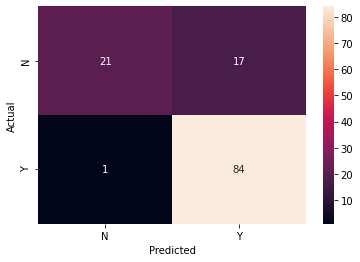

In [253]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [254]:
### Random Forest gives same results as Decision Tree Classifier

### Logistic Regression

In [255]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

<AxesSubplot:xlabel='Decision Threshold', ylabel='Values'>

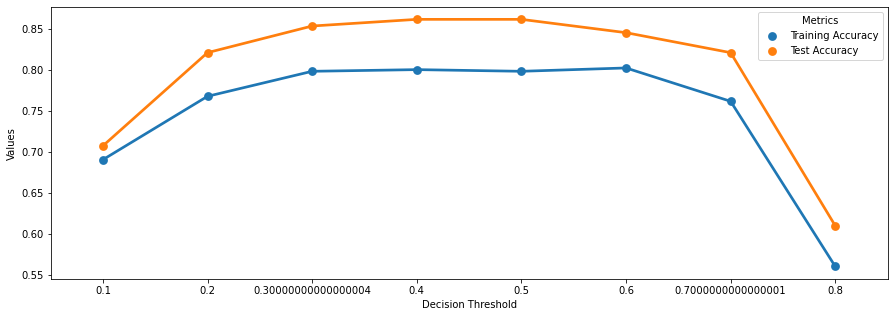

In [291]:
train_accuracies = []
test_accuracies = []
thresholds = []
for thresh in np.arange(0.1,0.9,0.1): 
    logreg_clf = LogisticRegression(solver='liblinear')
    logreg_clf.fit(X_train,y_train)
    
    y_pred_train_thresh = logreg_clf.predict_proba(X_train)[:,1]
    y_pred_train = (y_pred_train_thresh > thresh).astype(int)

    train_acc = accuracy_score(y_train,y_pred_train)
    
    
    y_pred_test_thresh = logreg_clf.predict_proba(X_test_imp)[:,1]
    y_pred_test = (y_pred_test_thresh > thresh).astype(int) 
    
    test_acc = accuracy_score(y_test,y_pred_test)
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    thresholds.append(thresh)
    
Threshold_logreg = {"Training Accuracy": train_accuracies, "Test Accuracy": test_accuracies,  "Decision Threshold": thresholds }
Threshold_logreg_df = pd.DataFrame.from_dict(Threshold_logreg)

plot_df = Threshold_logreg_df.melt('Decision Threshold',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Decision Threshold", y="Values",hue="Metrics", data=plot_df,ax=ax)    

In [258]:
### Logistic Regression does slightly better than Decision Tree and Random Forest. we take threshold=0.5.

In [293]:
from sklearn.preprocessing import PolynomialFeatures 
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_train_predicted = poly_model.predict(X_train_poly)
y_test_predicted = poly_model.predict(poly_features.fit_transform(X_test_imp))

C:\Users\Maram\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Maram\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


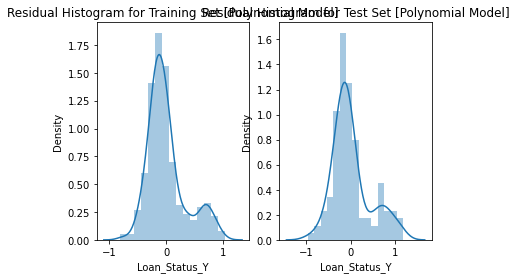

In [294]:
y_train_residual = y_train_predicted - y_train
y_test_residual = y_test_predicted - y_test

plt.subplot(1, 2, 1)
sns.distplot(y_train_residual, bins=15)
plt.title('Residual Histogram for Training Set [Polynomial Model]')

plt.subplot(1, 2, 2)
sns.distplot(y_test_residual, bins=15)
plt.title('Residual Histogram for Test Set [Polynomial Model]')

plt.show()

In [296]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
r2_train = r2_score(y_train, y_train_predicted)
     
print("The polynomial model performance for the test set")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

The polynomial model performance for the test set
RMSE of training set is 0.3364638629635216
R2 score of training set is 0.47411689790014355


In [297]:
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predicted))
r2_test = r2_score(y_test, y_test_predicted)

print("The polynomial model performance for the test set")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The polynomial model performance for the test set
RMSE of test set is 0.42761419599428885
R2 score of test set is 0.1435304450721132


In [299]:
thresh = 0.5
y_pred_test_thresh = logreg_clf.predict_proba(X_test_imp)[:,1]
y_pred = (y_pred_test_thresh > thresh).astype(int) 
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8617886178861789
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,22,16,38
1,1,84,85
All,23,100,123


In [265]:
### the accuracy found between all 3 models used is almost equal accuracy~86%

In [266]:
### all three models in this dataset could be used to improve the accuracy since all of them have the same result

In [300]:
from sklearn.neighbors import KNeighborsRegressor
KNN_model = KNeighborsRegressor(n_neighbors=3).fit(X_train,y_train)
KNN_predict = KNN_model.predict(X_test_imp)
print(KNN_predict)

[0.33333333 0.66666667 0.33333333 1.         1.         0.33333333
 0.33333333 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.33333333 0.66666667 0.66666667
 0.66666667 1.         0.33333333 1.         0.33333333 1.
 1.         0.66666667 0.33333333 0.66666667 1.         0.66666667
 0.33333333 0.66666667 1.         1.         0.         0.33333333
 0.66666667 0.33333333 0.33333333 1.         0.33333333 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 1.
 1.         1.         0.66666667 0.66666667 1.         0.66666667
 0.33333333 0.33333333 0.33333333 0.66666667 0.66666667 1.
 0.         0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 1.         0.66666667 0.66666667 0.33333333 1.         0.33333333
 0.66666667 1.         1.         1.         1.         0.66666667
 0.66666667 0.66666667 1.         1.         0.66666667 0.66666667
 0.33333333 0.33333333 1.         0.66666667 0.66666667 1.
 0.33333333 1.         1.  

In [268]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
train['Gender']=encoder.fit_transform(train['Gender'])
train['Married']=encoder.fit_transform(train['Married'])
train['Education']=encoder.fit_transform(train['Education'])
train['Self_Employed']=encoder.fit_transform(train['Self_Employed'])
train['Property_Area']=encoder.fit_transform(train['Property_Area'])

In [269]:
train.head()

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,Y
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,N
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,Y
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,Y
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,Y


In [270]:
new_data=[[0,1,0,0,0,2000,0.0,500,30.0,1.0,2]]

In [271]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=2, n_features=11, random_state=0)

model = LogisticRegression(solver='lbfgs')

model.fit(X, y)

new_data=[[0,1,0,0,0,2000,0.0,500,30.0,1.0,2]]

new_output = model.predict(new_data)

print(new_data, new_output)

[[0, 1, 0, 0, 0, 2000, 0.0, 500, 30.0, 1.0, 2]] [0]


In [272]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=2, n_features=11, random_state=0)

model = LogisticRegression(solver='lbfgs')

model.fit(X, y)

yhat = model.predict(X)

for i in range(10):
    print(X[i], yhat[i])

[ 0.02410954  2.07420294  9.40262762 -8.57477657 -9.24281017 -9.77391097
  7.57621006  6.2776791   6.37898896  9.80466581  5.82825473] 1
[ 1.3992391   1.74786845  7.32583445 -9.78456168 -8.41075159 -7.76415655
  7.46782352  4.49071632  8.23867164  7.47238345  6.22685235] 1
[ 2.6734991   1.08154904  6.88997367 -8.84957777 -7.25482592 -8.89445635
  6.82464804  5.38574996  8.17934247 10.43596692  4.97827024] 1
[-0.22363438  1.63572598  2.5452796  -0.35737532 -1.48450965  3.14867045
 -2.55803018  8.77885275  8.23728854 -2.92532558  4.65222505] 0
[ 2.19087783  3.91102913  1.89603798  2.05560419 -2.03459715  2.7773988
 -0.61391553  8.90606607  9.49616598 -5.22368945  6.17386673] 0
[-0.86487669  0.83578986  8.04072442 -9.01216027 -8.31992204 -9.32550134
  5.41287041  7.54508548  7.98920083 10.28061845  6.11860328] 1
[ 1.44091248  5.16790866  0.54880436  0.89469891 -3.30394762  3.0473751
 -3.33149028  7.15371449  8.6621893  -3.04001944  7.28602878] 0
[ 1.4203411  -0.61313992  9.21083404 -8.547

In [273]:
test=pd.read_csv('C:\\Users\\Maram\\Desktop\\GoMyCode\\Test_loan_Home.csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncomeMonthly,CoapplicantIncomeMonthly,LoanAmountThousands,Loan_Amount_Term_Months,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [274]:
num=['ApplicantIncomeMonthly','CoapplicantIncomeMonthly','LoanAmountThousands','Loan_Amount_Term_Months','Credit_History']
test.dropna(axis=1,how='all')
test[num] = test[num].fillna(test.mean())
test['Gender'].fillna('Male', inplace=True)
test['Married'].fillna('Yes', inplace=True)
test['Dependents'].fillna('0', inplace=True)
test['Self_Employed'].fillna('No', inplace=True)

In [275]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
test['Gender']=encoder.fit_transform(test['Gender'])
test['Married']=encoder.fit_transform(test['Married'])
test['Education']=encoder.fit_transform(test['Education'])
test['Self_Employed']=encoder.fit_transform(test['Self_Employed'])
test['Property_Area']=encoder.fit_transform(test['Property_Area'])
test['Dependents']=encoder.fit_transform(test['Dependents'])

In [276]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Loan_ID                   367 non-null    object 
 1   Gender                    367 non-null    int32  
 2   Married                   367 non-null    int32  
 3   Dependents                367 non-null    int32  
 4   Education                 367 non-null    int32  
 5   Self_Employed             367 non-null    int32  
 6   ApplicantIncomeMonthly    367 non-null    int64  
 7   CoapplicantIncomeMonthly  367 non-null    int64  
 8   LoanAmountThousands       367 non-null    float64
 9   Loan_Amount_Term_Months   367 non-null    float64
 10  Credit_History            367 non-null    float64
 11  Property_Area             367 non-null    int32  
dtypes: float64(3), int32(6), int64(2), object(1)
memory usage: 25.9+ KB


In [277]:
test=test.drop(columns=['Loan_ID'])

In [278]:
yhat = model.predict(test)
print(yhat)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
